## BANH MI BOYS REVIEWS TEXT ANALYSIS

Now it is time to discover the strenghts and weaknesses of the selected business, Bahn Mi Boys in Toronto.<br>
In order to do that, we are going to analyse all the customer reviews available in the yelp datasets. As the size of the json file for the reviews is too big, we previously extracted the specific data for this business in a csv file ('reviews_bahnmi.csv'). This is the one we are using throughout this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import nltk

In [2]:
restaurants_reviews=pd.read_csv('reviews_bahnmi.csv')

First we will start by splitting the reviews into good and bad ones. We will consider good reviews when the user gives 4 or 5 stars rating to the restaurant, whereas when the rating is 1,2 or 3 stars will be considered as a bad review.<br>



Since this restaurant is very well rated on average, actually that is why we decided to choose it, the distribution between "good" and "bad" reviews, are quite unbalanced.

In [3]:
print('Number of bad reviews(<=3) is ',len(restaurants_reviews[restaurants_reviews.stars_x<3.5]),' ','Number of good reviews(>=4) is',len(restaurants_reviews[restaurants_reviews.stars_x>3.5]))

Number of bad reviews(<=3) is  275   Number of good reviews(>=4) is 1472


In [5]:
restaurants_reviews.review_count.value_counts()

1097    1129
483      493
108      111
13        14
Name: review_count, dtype: int64

Even though there are not that many bad reviews, we want to know the weaknesses of the restaurant even if they are small in order to avoid them in the future chain as well as the strengths in order to exploit them.<br>
Therefore we will start by visualising the most common words in both bad and good reviews. We will use the function defined in Week 3 excercices of the course.

In [324]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)


    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,
        max_font_size=100, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud, interpolation="bilinear")  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

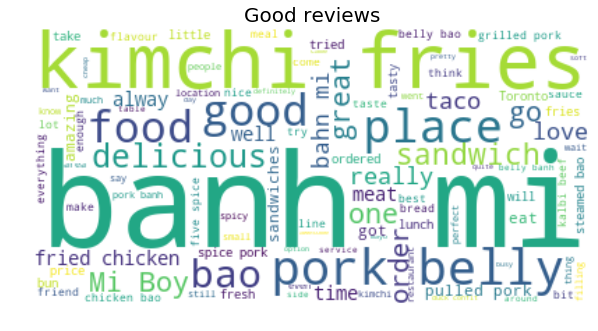

In [325]:
show_wordcloud(restaurants_reviews[restaurants_reviews.stars_x>3.5], "Good reviews")

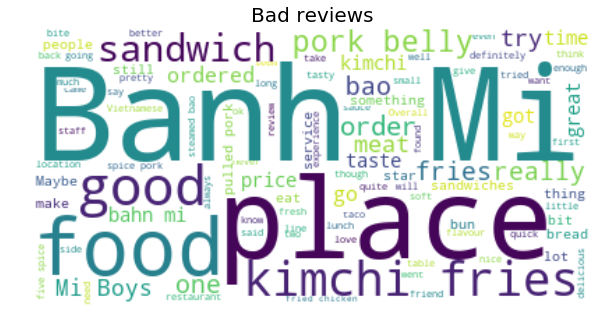

In [326]:
show_wordcloud(restaurants_reviews[restaurants_reviews.stars_x<3.5], "Bad reviews")

We can see that both wordclouds look quite similar, and we can't get any important insight from this. Therefore we are going to explore it more in depth. We will redisign the function to consider nouns only because we want to identify **things** that are good or bad. Apart from that we will remove some nouns that are present quite often but can't give us any insight (food, banh, mi, boys....)

## GET ONLY NOUNS

In [319]:
def show_wordcloud_nouns(data_restaurants, title):
    
    
    stopwords = set(wordcloud.STOPWORDS)
    text=' '.join(data_restaurants['text'].astype(str).tolist())
    #text = data_restaurants['text'].astype(str).tolist()
    tokens = nltk.word_tokenize(text)
    avoid_words=['food','banh','mi','boys','restaurant','time','place','*','garbage','yummy','bomb','heat','situation','experience']
    for word in avoid_words:
        while word in tokens: tokens.remove(word) 
    pre_nouns = nltk.pos_tag(tokens)
    nouns = [a for (a, b) in pre_nouns if b == 'NN']
    text_cloud = ' '.join(list(nouns))
    fdist = nltk.FreqDist(nouns)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,
        max_font_size=100, max_words=100, background_color="white").generate(text_cloud)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud, interpolation="bilinear")  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()
   




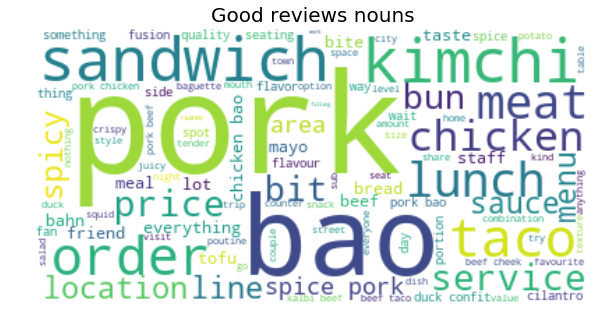

In [320]:
show_wordcloud_nouns(restaurants_reviews[restaurants_reviews.stars_x>3.5], "Good reviews nouns")

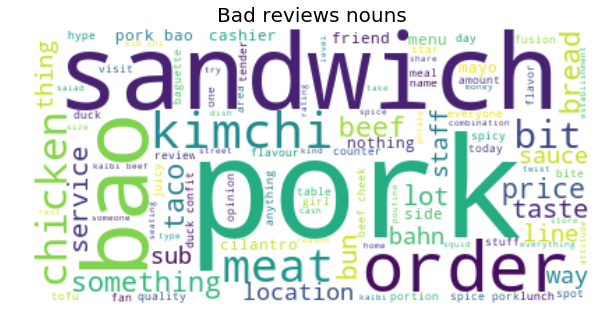

In [321]:
show_wordcloud_nouns(restaurants_reviews[restaurants_reviews.stars_x<3.5], "Bad reviews nouns")

We have not improved so much. We can see now more concrete things that are present in both good and bad reviews, but they still look similar. Therefore we are going to analyse which words are more present in the bad ones compared to the good ones and viceversa.

In [327]:
da=restaurants_reviews[(restaurants_reviews['name']=='Banh Mi Boys') &(restaurants_reviews.stars_x<3.5)]
text=' '.join(da['text'].astype(str).tolist())
tokens = nltk.word_tokenize(text)
avoid_words=['food','banh','mi','boys','restaurant','time','place','*','garbage','yummy','bomb','heat','situation','experience','everything','anything']
for word in avoid_words:
    while word in tokens: tokens.remove(word) 
pre_nouns_b = nltk.pos_tag(tokens)
nouns = [a for (a, b) in pre_nouns_b if b == 'NN']
text_cloud = ' '.join(list(nouns))
fdist = nltk.FreqDist(nouns)

In [328]:
dag=restaurants_reviews[(restaurants_reviews['name']=='Banh Mi Boys') &(restaurants_reviews.stars_x>3.5)]
text=' '.join(dag['text'].astype(str).tolist())
tokens = nltk.word_tokenize(text)
avoid_words=['food','banh','mi','boys','restaurant','time','place','*','garbage','yummy','bomb','heat','situation','experience','experience','everything','anything']
for word in avoid_words:
    while word in tokens: tokens.remove(word) 
pre_nouns_g = nltk.pos_tag(tokens)
nounsg = [a for (a, b) in pre_nouns_g if b == 'NN']
text_cloud = ' '.join(list(nounsg))
fdistg = nltk.FreqDist(nounsg)

In [329]:
noung=pd.DataFrame(fdistg.most_common())

In [330]:
noung.columns=['Word','Count_good']

In [331]:
nounb=pd.DataFrame(fdist.most_common())
nounb.columns=['Word','Count_bad']

In [332]:
rest_rev_analysis=nounb.merge(noung,on='Word',how='left')

In [334]:
rest_rev_analysis['Count_good']=rest_rev_analysis['Count_good'].fillna(0.5)


In [335]:
rest_rev_analysis['ratio']=rest_rev_analysis['Count_bad']/rest_rev_analysis['Count_good']

In [336]:
rest_rev_analysis=rest_rev_analysis.sort_values(by='ratio',ascending=False)

In [339]:
rest_rev_analysis[rest_rev_analysis.Count_bad>10][:10]

,Word,Count_bad,Count_good,ratio
29,cashier,27,22.0,1.227273
77,rating,11,9.0,1.222222
67,opinion,12,13.0,0.923077
68,customer,12,14.0,0.857143
28,nothing,27,34.0,0.794118
35,sub,24,32.0,0.750000
63,girl,14,21.0,0.666667
36,hype,23,35.0,0.657143
42,everyone,21,34.0,0.617647
78,money,11,20.0,0.550000


In [340]:
rest_rev_analysis_good=noung.merge(nounb,on='Word',how='left')

In [341]:
rest_rev_analysis_good['Count_bad']=rest_rev_analysis_good['Count_bad'].fillna(0.5)

In [342]:
rest_rev_analysis_good['ratio']=rest_rev_analysis_good['Count_good']/rest_rev_analysis_good['Count_bad']

In [343]:
rest_rev_analysis_good=rest_rev_analysis_good.sort_values(by='ratio',ascending=False)
rest_rev_analysis_good[rest_rev_analysis_good.Count_good>100][:10]

,Word,Count_good,Count_bad,ratio
22,tacos,142,11.0,12.909091
7,lunch,273,23.0,11.869565
11,menu,216,25.0,8.640000
8,taco,260,32.0,8.125000
16,tofu,171,22.0,7.772727
17,spicy,171,24.0,7.125000
4,chicken,406,59.0,6.881356
23,baos,135,20.0,6.750000
27,meal,126,19.0,6.631579
9,spice,230,36.0,6.388889


In [264]:
nounsg = [a[-1] for (a, b) in pre_nouns if a == 'chicken']

In [175]:
big=nltk.bigrams(nounsg)

In [214]:
p=[]
for (a, b) in pre_nouns_b:
    p.append(a)

In [221]:
posterior=[]
previous=[]
for w in range(len(p)):
    if p[w]=='squid':
        posterior.append((p[w-3]+' '+ p[w-2]+' '+p[w-1]+' '+ p[w]+' '+p[w+1]+' '+p[w+2]+' '+p[w+3]))
        
        

In [222]:
posterior

['duck confit , squid , etc .',
 ') . The squid sounded interesting and',
 'tacos , 1 squid taco , 1',
 'itself : 1 squid taco - The',
 ', particularly the squid . It seemed',
 'cheek , to squid and duck confit']